# Boosting
A meta learning algorithm that are well suited to decision trees but can be used to practically any ML
(it is meta learning not machine learning)
process of aggregating a bunch of weak learners in a larger ensemble of models. It is a combination of estimators
- Can an ensemble of weak learners (very simple models) be a strong learner when combined.
- AdaBoost = adaptive boosting
- we build trees in sequence.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


<AxesSubplot:xlabel='class', ylabel='count'>

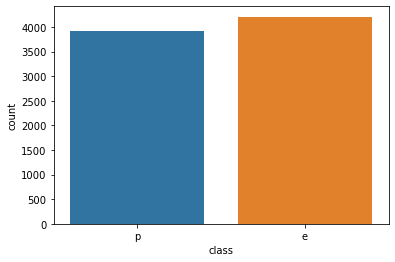

In [4]:
sns.countplot(data=df, x='class')

In [5]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'veil-type'),
  Text(1, 0, 'class'),
  Text(2, 0, 'bruises'),
  Text(3, 0, 'gill-attachment'),
  Text(4, 0, 'gill-spacing'),
  Text(5, 0, 'gill-size'),
  Text(6, 0, 'stalk-shape'),
  Text(7, 0, 'ring-number'),
  Text(8, 0, 'cap-surface'),
  Text(9, 0, 'veil-color'),
  Text(10, 0, 'stalk-surface-below-ring'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'ring-type'),
  Text(13, 0, 'stalk-root'),
  Text(14, 0, 'cap-shape'),
  Text(15, 0, 'population'),
  Text(16, 0, 'habitat'),
  Text(17, 0, 'stalk-color-above-ring'),
  Text(18, 0, 'stalk-color-below-ring'),
  Text(19, 0, 'odor'),
  Text(20, 0, 'spore-print-color'),
  Text(21, 0, 'cap-color'),
  Text(22, 0, 'gill-color')])

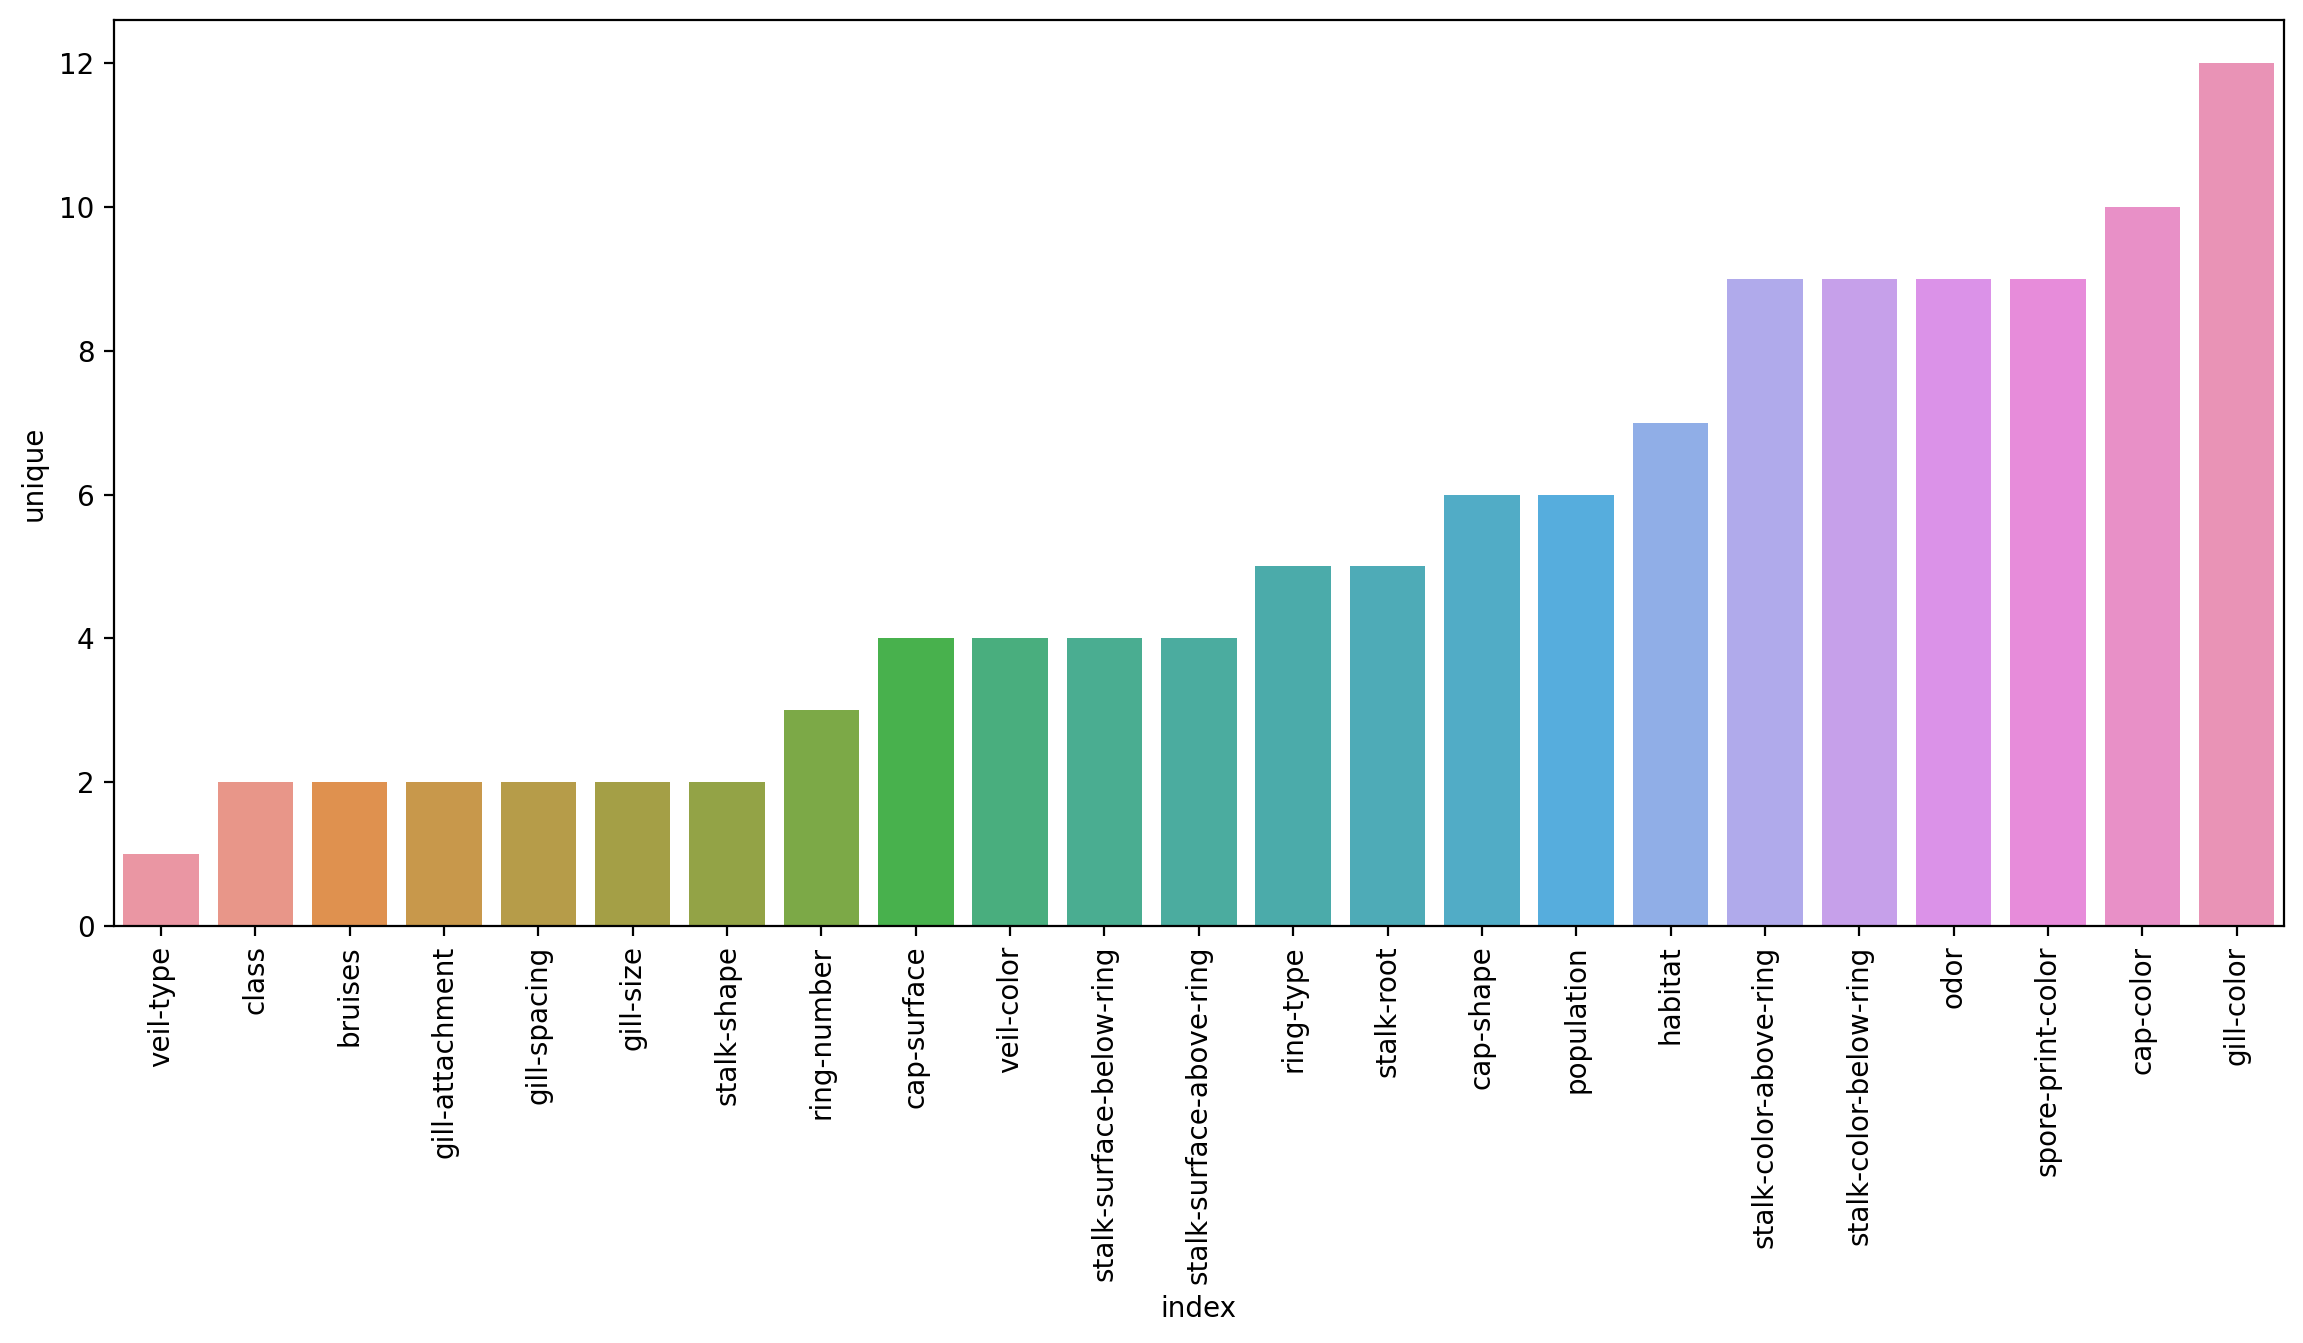

In [10]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feat_uni, x='index', y='unique')
plt.xticks(rotation=90)

In [11]:
X = df.drop('class', axis=1)

In [12]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
X = pd.get_dummies(X, drop_first=True)

In [14]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [15]:
y = df['class']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
model = AdaBoostClassifier(n_estimators=1) # Has to find single best feature to split on...

In [20]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [22]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [23]:
preds = model.predict(X_test)

In [24]:
print(classification_report(y_test, preds)) # Impressive for one stump

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [25]:
# What is it splitting on?
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
model.feature_importances_.argmax()

22

In [29]:
X.columns[22] # No odor

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

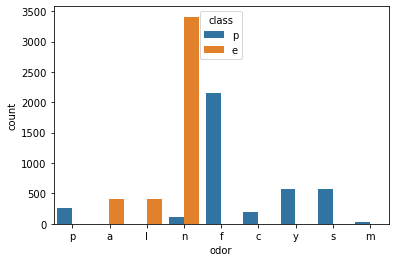

In [31]:
sns.countplot(data=df, x='odor', hue='class') # Most of mushrooms with no odor are likely to be edible.

In [32]:
len(X.columns)

95

In [33]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    error_rates.append(err)

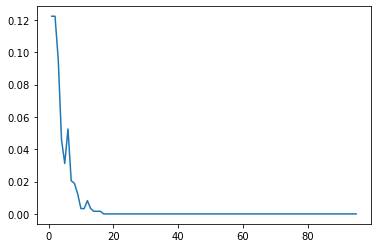

In [34]:
plt.plot(range(1, 96), error_rates)

In [39]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])

In [44]:
feats[feats['Importance'] > 0].sort_values('Importance', ascending=False)

,Importance
spore-print-color_w,0.168421
population_c,0.105263
gill-spacing_w,0.094737
gill-size_n,0.094737
odor_n,0.063158
stalk-surface-above-ring_k,0.063158
stalk-color-below-ring_n,0.063158
bruises_t,0.052632
spore-print-color_r,0.052632
population_v,0.042105


# Gradient Boosting
- Allows larger decision trees.
- based on training on residuals of previous model. (true y value - prediciton = residual)
- tries to predict the residual of the original model.
- this lets us egde closer to the correct predictions

In [45]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [46]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [47]:
X = df.drop('class', axis=1)

In [48]:
X = pd.get_dummies(X, drop_first=True)

In [49]:
y = df['class']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5]
}

In [55]:
gb_model = GradientBoostingClassifier()

In [56]:
grid = GridSearchCV(gb_model, param_grid)

In [57]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [58]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report

In [59]:
preds = grid.predict(X_test)

In [60]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [61]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [62]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [64]:
grid.best_estimator_.feature_importances_

array([ 1.71990251e-04,  2.68161420e-16,  0.00000000e+00,  0.00000000e+00,
        3.03149545e-20,  1.68661908e-03,  3.83073811e-16,  9.71701416e-16,
        0.00000000e+00,  4.56707680e-17,  1.81766689e-16,  0.00000000e+00,
        2.12418931e-17,  0.00000000e+00,  0.00000000e+00,  8.97927174e-18,
        2.40642343e-03,  5.40750871e-02,  1.30525988e-04,  1.44279306e-02,
        2.07370954e-02,  5.64616249e-05,  6.15629900e-01,  8.13910350e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.21929787e-02,
        1.11780269e-02,  0.00000000e+00,  1.82181319e-17,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.01537318e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.20349242e-04,  1.28931383e-01,  8.46804788e-03,
        4.28753504e-03,  1.29755855e-03,  0.00000000e+00,  0.00000000e+00,
       -6.15766957e-19,  3.08474263e-04,  6.17317798e-02,  8.01025119e-05,
        0.00000000e+00,  

In [65]:
fet_imp = grid.best_estimator_.feature_importances_

In [66]:
imp_features = pd.DataFrame(index=X.columns, data=fet_imp, columns=['Importance'])

In [69]:
imp_features.sort_values('Importance', ascending=False)

,Importance
odor_n,6.156299e-01
stalk-root_c,1.289314e-01
stalk-surface-below-ring_y,6.173178e-02
bruises_t,5.407509e-02
spore-print-color_r,3.195716e-02
...,...
stalk-color-above-ring_p,0.000000e+00
stalk-color-above-ring_w,0.000000e+00
stalk-color-below-ring_e,0.000000e+00
habitat_w,0.000000e+00
